In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [2]:
data = pd.read_csv("./통신고객이탈.csv", engine="python")
data.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [3]:
data.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [4]:
data.drop("CUSTOMER_ID",axis=1,inplace=True)
data.CHURN.value_counts()

Active     750
Churned    180
Name: CHURN, dtype: int64

In [5]:
data.CHURN = data.CHURN.map(lambda x : 0 if x == 'Active' else 1)
data.CHURN.value_counts()

0    750
1    180
Name: CHURN, dtype: int64

In [6]:
data_dummy = pd.get_dummies(data)
data_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

df_y = data_dummy.CHURN
df_x = data_dummy.drop("CHURN",axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (651, 33)
train data Y size: (651,)
test data X size: (279, 33)
test data Y size: (279,)


In [9]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print("Accucary on training set: {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.853


In [10]:
tree_uncustomized.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')>

In [13]:
train_accuracy =[]
test_accuracy = []

para_criterion = ['gini',"entropy"]

for criterion in para_criterion:
    tree1 = DecisionTreeClassifier(criterion=criterion, random_state=1234)
    tree1.fit(df_train_x,df_train_y)
    train_accuracy.append(tree1.score(df_train_x,df_train_y))
    test_accuracy.append(tree1.score(df_test_x,df_test_y))
    
df_accuracy1 = pd.DataFrame()
df_accuracy1["Criterion"] = para_criterion
df_accuracy1["TrainAccuracy"] = train_accuracy
df_accuracy1["TestAccuracy"] = test_accuracy
df_accuracy1.round(3)

,Criterion,TrainAccuracy,TestAccuracy
0,gini,1.0,0.853
1,entropy,1.0,0.832


In [14]:
train_accuracy =[]
test_accuracy = []

para_criterion = []
para_max_depth=[]

n_iter_depth = 10
list_criterion = ['gini',"entropy"]

for criterion in list_criterion:
    for depth in range(1,n_iter_depth+1):
        tree2 = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=1234)
        tree2.fit(df_train_x,df_train_y)

        train_accuracy.append(tree2.score(df_train_x,df_train_y))
        test_accuracy.append(tree2.score(df_test_x,df_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(depth)

In [15]:
df_accuracy2 = pd.DataFrame()
df_accuracy2["Criterion"] = para_criterion
df_accuracy2["Depth"] = para_max_depth
df_accuracy2["TrainAccuracy"] = train_accuracy
df_accuracy2["TestAccuracy"] = test_accuracy
df_accuracy2.round(3)

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.839,0.860
1,gini,2,0.866,0.889
2,gini,3,0.889,0.910
3,gini,4,0.892,0.910
4,gini,5,0.920,0.903
5,gini,6,0.931,0.875
6,gini,7,0.951,0.860
7,gini,8,0.959,0.842
8,gini,9,0.963,0.853
9,gini,10,0.972,0.857


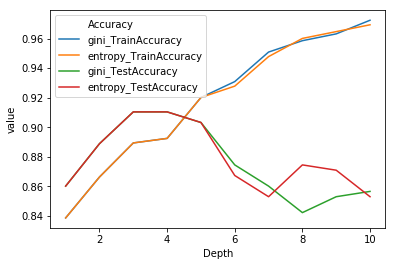

In [16]:
df_accuracy2_melt = pd.melt(df_accuracy2, id_vars=["Criterion","Depth"])
df_accuracy2_melt["Accuracy"] = df_accuracy2_melt["Criterion"] +"_"+ df_accuracy2_melt["variable"]
sns.lineplot(x="Depth",y="value",hue="Accuracy",data=df_accuracy2_melt)

In [17]:
train_accuracy = []; test_accuracy = []
para_criterion = []; para_max_depth = []; para_min_leaf_size = []
max_depth = 10

list_min_leaf_size = [i*10 for i in range(1,6)]

for criterion in list_criterion:
    for leafsize in list_min_leaf_size:
        tree3 = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, 
                                       min_samples_leaf=leafsize, random_state=1234)
        
        tree3.fit(df_train_x,df_train_y)
        train_accuracy.append(tree3.score(df_train_x,df_train_y))
        test_accuracy.append(tree3.score(df_test_x,df_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(max_depth)
        para_min_leaf_size.append(leafsize)

In [18]:
df_accuracy3 = pd.DataFrame()
df_accuracy3["Criterion"] = para_criterion
df_accuracy3["Depth"] = para_max_depth
df_accuracy3["MinLeafSize"] = para_min_leaf_size
df_accuracy3["TrainAccuracy"] = train_accuracy
df_accuracy3["TestAccuracy"] = test_accuracy
df_accuracy3.round(3)

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,10,10,0.909,0.871
1,gini,10,20,0.903,0.910
2,gini,10,30,0.848,0.871
3,gini,10,40,0.848,0.871
4,gini,10,50,0.802,0.785
5,entropy,10,10,0.909,0.871
6,entropy,10,20,0.903,0.910
7,entropy,10,30,0.848,0.871
8,entropy,10,40,0.848,0.871
9,entropy,10,50,0.840,0.857


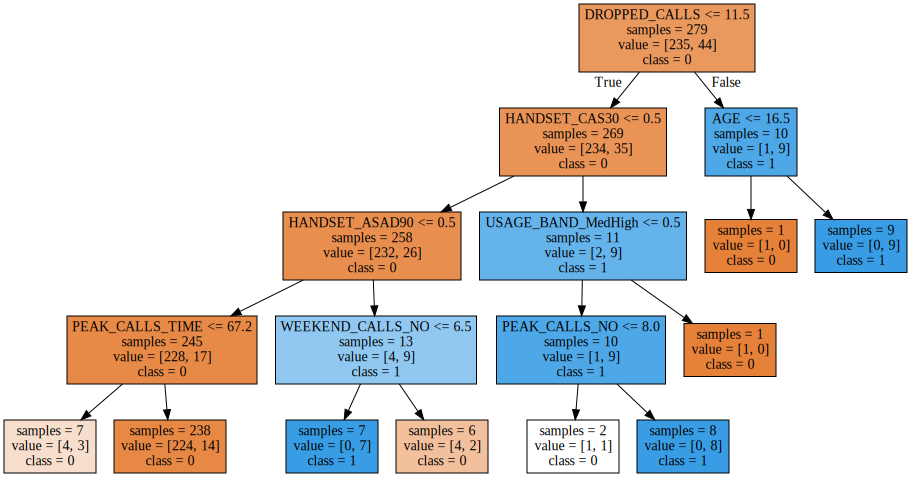

In [21]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4,random_state=1234)
tree.fit(df_test_x,df_test_y)

export_graphviz(tree,out_file="tree.dot", class_names=['0','1'], feature_names=df_test_x.columns,
                impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

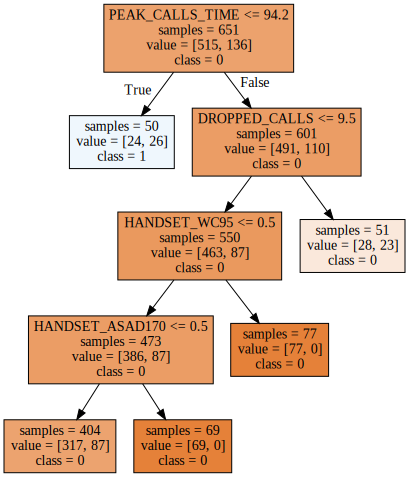

In [22]:
tree4 = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=50,random_state=1234)
tree5 = tree4.fit(df_train_x,df_train_y)

export_graphviz(tree5,out_file="tree2.dot", class_names=['0','1'], feature_names=df_test_x.columns,
                impurity=False, filled=True)

with open("tree2.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

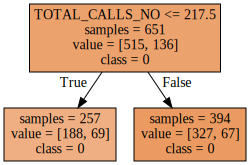

In [23]:
tree4 = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=200,random_state=1234)
tree5 = tree4.fit(df_train_x,df_train_y)

export_graphviz(tree5,out_file="tree3.dot", class_names=['0','1'], feature_names=df_test_x.columns,
                impurity=False, filled=True)

with open("tree3.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

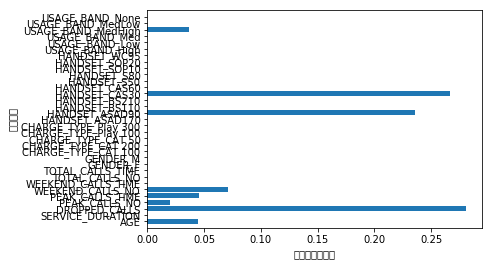

In [26]:
# gb_model = DecisionTreeClassifier(learning_rate=0.1,max_depth=4,min_samples_leaf=30, n_estimators=5,random_state=1234)
# gb_model.fit(df_train_x_scaled,df_train_y)

df_feature_importance = pd.DataFrame()
df_feature_importance["feature"] = df_train_x.columns
df_feature_importance["importance"] = tree.feature_importances_
df_feature_importance.sort_values(by="importance",ascending=False)

import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = df_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),df_train_x.columns)
    plt.xlabel("설명변수중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)

plot_feature_importances(tree)